### Sign Language MNIST

<br>

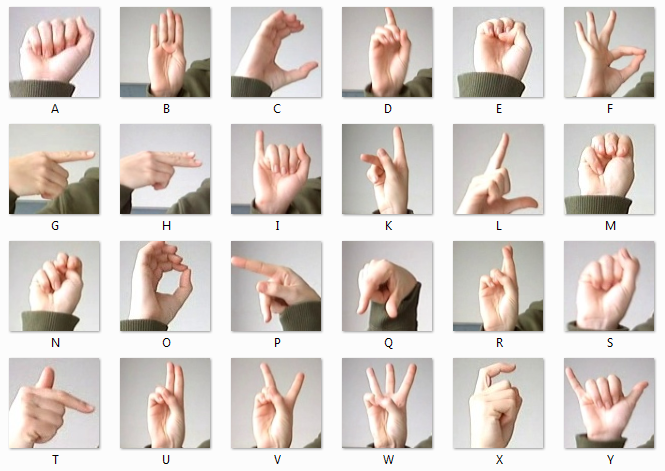

In [1]:
# Import packages
import os
import zipfile

from jupyterthemes import jtplot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
# Download data
# !kaggle datasets download datamunge/sign-language-mnist

In [3]:
dataset_path = os.path.join(os.getcwd(), "Data/sign-language-mnist.zip")
data_dir = os.path.join(os.getcwd(), "Data/")

with zipfile.ZipFile(dataset_path, 'r') as zipobj:
    zipobj.extractall(data_dir)

In [4]:
os.listdir(os.path.join(data_dir))

['.DS_Store',
 'sign-language-mnist.zip',
 'american_sign_language.PNG',
 'sign_mnist_test.csv',
 'sign_mnist_train',
 'sign_mnist_train.csv',
 'sign_mnist_test',
 'amer_sign3.png',
 'amer_sign2.png']

##### As we see the data is not images, rather it is a csv file which contains pixel values

### Explore the dataset and transform the data into images

    1. Check the original dataset (csv file with values for pixels)
    2. Reshape the data for getting the dimensions required by the CNNs

In [5]:
training_csv = os.path.join(data_dir, "sign_mnist_train.csv")
test_csv = os.path.join(data_dir, "sign_mnist_test.csv")

train_df = pd.read_csv(training_csv)
test_df = pd.read_csv(test_csv)

print(f"Shape of the dataset: {train_df.shape}")
train_df.head()

Shape of the dataset: (27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


#### Split, reshape and visualize the data
    1. Separate the data into x_train, y_train, x_test, y_test
    2. Reshape the 1D pixel array into 3D arrays
    3. Visualize the data by plotting the images

In [6]:
y_train = train_df['label']
y_test = test_df['label']

# Remove the label columns
del train_df['label']
del test_df['label']

x_train = train_df.values
x_test = test_df.values

In [7]:
# Check the shape of the data

print(f"Shape of training images (before reshaping): {x_train.shape}")
print(f"Shape of test images (before reshaping): {x_test.shape}")

Shape of training images (before reshaping): (27455, 784)
Shape of test images (before reshaping): (7172, 784)


In [8]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [9]:
# Reshape the images
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

print(f"Shape of training images (After reshaping): {x_train.shape}")
print(f"Shape of test images (After reshaping): {x_test.shape}")

Shape of training images (After reshaping): (27455, 28, 28, 1)
Shape of test images (After reshaping): (7172, 28, 28, 1)


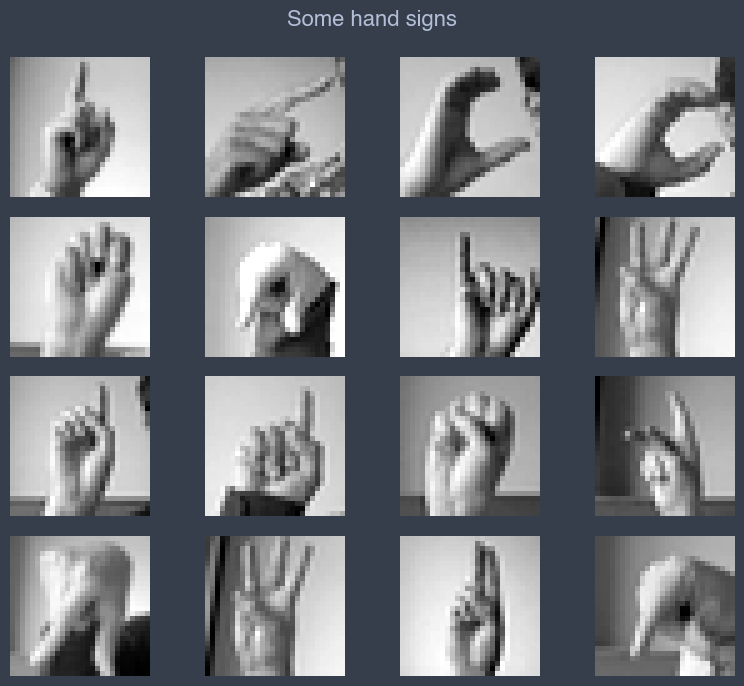

In [19]:
jtplot.style(context='notebook', theme='onedork')
fig, axes = plt.subplots(4,4)
fig.suptitle("Some hand signs")
m = 0

for i in range(4):
    for j in range(4):
        axes[i,j].axis("off")
        axes[i,j].imshow(x_train[m], cmap='gray')
        m+=1
    plt.tight_layout()

### Define augmentation layers and model

    1. Use various augmentation layers available in keras
    2. Visualizing augmentations
    3. Create a model with augmentation and convolution layers

In [11]:
augmentation_layers = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode='horizontal'),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomTranslation(0.2, 0.2),
    tf.keras.layers.RandomContrast(0.2)
])

2025-06-29 02:05:44.185440: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-06-29 02:05:44.185472: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-06-29 02:05:44.185476: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
I0000 00:00:1751142944.185490 17443779 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1751142944.185509 17443779 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


#### Visualizing augmentations

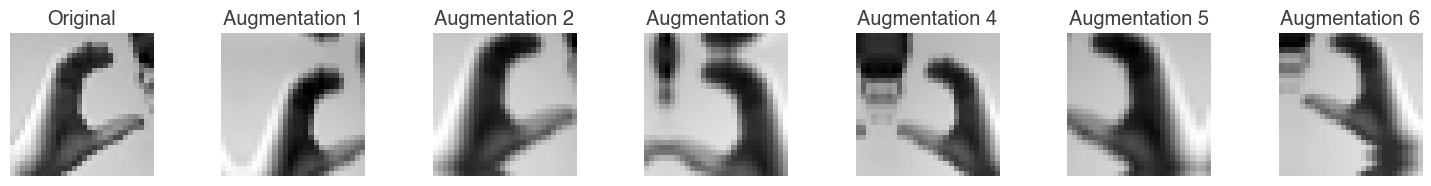

In [23]:
original_image = x_train[2]
num_augmentations = 6
fig, axes = plt.subplots(1, num_augmentations + 1, figsize=(15, 2))

# Display the original image
axes[0].imshow(original_image.squeeze(), cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

# Apply augmentations and display the results
for i in range(num_augmentations):
    # The augmentation layers expect a batch dimension, so add one at index=0
    augmented_image = augmentation_layers(tf.expand_dims(original_image, 0))
    # Remove the batch dimension and squeeze the channel dimension for imshow
    axes[i + 1].imshow(augmented_image[0].numpy().squeeze(), cmap='gray')
    axes[i + 1].set_title(f'Augmentation {i+1}')
    axes[i + 1].axis('off')

plt.tight_layout()
plt.show()

In [13]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    augmentation_layers,
    tf.keras.layers.Rescaling(1./255),
    # Conv set 1
    tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2,2),
    # Conv set 2
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # Conv set 3
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # Conv set 4
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(24, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 3, 3, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │        12,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,520 (416.09 KB)

 Trainable params: 106,168 (414.72 KB)

 Non-trainable params: 352 (1.38 KB)

### Compile and train the model

<br>The callback `ReduceLRonPlateau` would be used here, this does the following: <br><br>
    
        When the training becomes stagnant with a certain value of learning rate, the learning rate is reduced by a certain factor. You can imagine this like being stuck on a plateau and then jumping down the plateau to go to the bottom of the mountain.

In [14]:
# ReduceLRonPlateau callback
lr_reduction_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                                            factor=0.5,
                                                            verbose=1,
                                                            patience=2,
                                                            min_lr=0.00001)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Train the model
history = model.fit(x_train, y_train, 
                    batch_size=128, 
                    epochs=25, 
                    validation_data = (x_test, y_test), 
                    callbacks=[lr_reduction_callback])

Epoch 1/25


2025-06-29 02:05:46.121692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


215/215 ━━━━━━━━━━━━━━━━━━━━ 19s 72ms/step - accuracy: 0.1270 - loss: 3.0539 - val_accuracy: 0.1008 - val_loss: 3.4034 - learning_rate: 0.0010
Epoch 2/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - accuracy: 0.3966 - loss: 1.8101 - val_accuracy: 0.3582 - val_loss: 2.1258 - learning_rate: 0.0010
Epoch 3/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - accuracy: 0.5513 - loss: 1.3090 - val_accuracy: 0.7269 - val_loss: 0.6973 - learning_rate: 0.0010
Epoch 4/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.6502 - loss: 1.0153 - val_accuracy: 0.7840 - val_loss: 0.6167 - learning_rate: 0.0010
Epoch 5/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - accuracy: 0.7068 - loss: 0.8442 - val_accuracy: 0.8822 - val_loss: 0.3235 - learning_rate: 0.0010
Epoch 6/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - accuracy: 0.7458 - loss: 0.7396 - val_accuracy: 0.8982 - val_loss: 0.3066 - learning_rate: 0.0010
Epoch 7/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.7744 - loss: 0.6593

In [16]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9598 - loss: 0.1026
Accuracy of the model is -  96.04015350341797 %


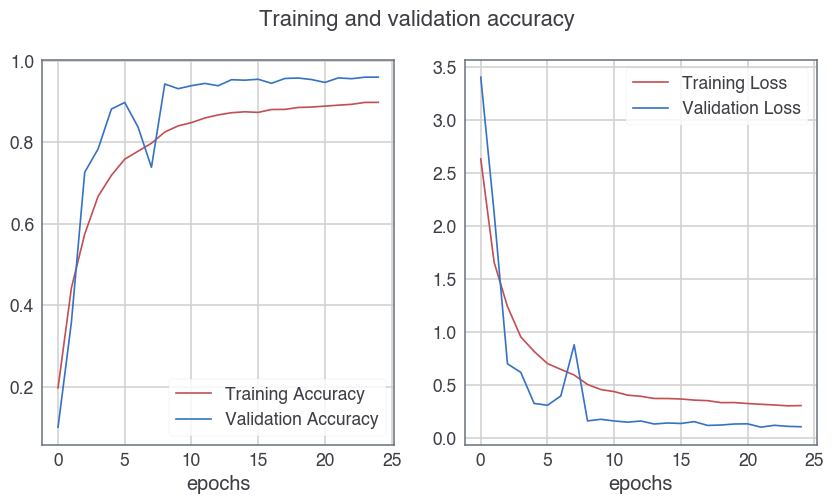

In [22]:
jtplot.style(theme="grade3")
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()